In [1]:
#from ghc.homomorphism import hom 
from ghc.utils.data import load_data
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import homlib as hl
from homlib import Graph as hlGraph
import random
import seaborn as sns
import matplotlib.colors
import os
import pickle as pkl
from itertools import combinations
import time

seed = 21

#this part belongs to article
def hom(F, G, use_py=False, density=False):
    """Wrapper for the `hom` function in `homlib`."""
    # Default homomorphism function
    hom_func = hl.hom
    # Check if tree, then change the hom function
    if use_py:
        hom_func = hom_tree
    # Check and convert graph type
    if density:
        scaler = 1.0 / (G.number_of_nodes() ** F.number_of_nodes())
    else:
        scaler = 1.0
    if not use_py:
        #see explanation below
        F = nx2homg(F)
        G = nx2homg(G)
    return hom_func(F, G) * scaler

def nx2homg(nxg):
    """Convert nx graph to homlib graph format. Only
    undirected graphs are supported.
    Note: This function expects nxg to have consecutive integer index."""
    n = nxg.number_of_nodes()
    G = hlGraph(n)
    for (u, v) in nxg.edges():
        G.addEdge(u,v)
    return G

def load_data(dname, dloc):
    """Load datasets"""
    X = None
    y = None
    graphs = None
    name = os.path.abspath(os.path.join(dloc, dname))
    with open(name+".graph", "rb") as f:
        graphs = pkl.load(f)
    with open(name+".y", "rb") as f:
        y = pkl.load(f)
    if os.path.exists(name+".X"):
        with open(name+".X", "rb") as f:
            X = pkl.load(f)
    return graphs, X, y

def tree_list(size=6, num_loops=0):
    """Generate nonisomorphic trees up to size `size`."""
    t_list = [tree for i in range(2, size+1) for tree in \
                       nx.generators.nonisomorphic_trees(i)]
    if num_loops > 0:
        t_list = add_loops(t_list, num_loops)
    return t_list


def cycle_list(size=6, num_loops=0):
    """Generate undirected cycles up to size `size`. Parallel
    edges are not allowed."""
    c_list = [nx.generators.cycle_graph(i) for i in range(2, size+1)]
    if num_loops > 0:
        c_list = add_loops(c_list, num_loops)
    return c_list

def add_loops(graph_lists, num_loops):
    g_with_loops = []
    for g in graph_lists:
        for loop_indices in combinations(g.nodes(), num_loops):
            new_graph = g.copy()
            for i in loop_indices:
                new_graph.add_edge(i,i)
            g_with_loops.append(new_graph)
    g_list = graph_lists + g_with_loops
    return g_list

In [2]:
def VisualizeGraph(G):
    plt.figure(figsize=(10,8)) 
    nx.draw_networkx(G,node_color=range(G.number_of_nodes()))
    plt.show()

In [3]:
#function to calculate degree centrality
def degree_centrality(G):
    return dict(G.degree(weight = "weight"))

In [4]:
#load one of the datasets from article github folder and get graph list
graphs, X, y = load_data("MUTAG", "./data")
time.sleep(3)
#create tree list from function which was coded by authors
trees = tree_list(6, num_loops=1)
time.sleep(3)
#create cycle list from function which was coded by authors
cycles = cycle_list(4, num_loops=1)

# I- Graph datasets G 1 and G 2 description.

In [5]:
random.seed(seed)

#select randomly a graph
G1=random.choice(graphs)
#get its adjacency matrix
G1_adj=nx.to_numpy_array(G1)

NUMBER OF NODES  19
NUMBER OF EDGES  22
ADJACENCY MATRIX= 
 [[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

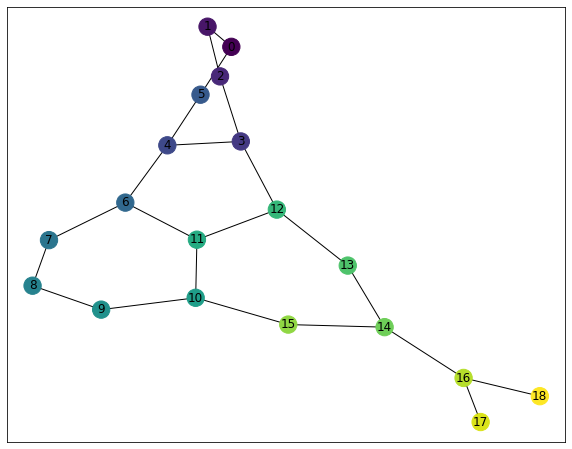

In [6]:
#print node and edge count of chosen G1
print("NUMBER OF NODES ", G1.number_of_nodes())
print("NUMBER OF EDGES ", G1.number_of_edges())
#print adjacency matrix of the graph
print("ADJACENCY MATRIX= \n", G1_adj)
#plot graph
VisualizeGraph(G1)

In [7]:
random.seed(seed)

#select tree randomly from list
T1=random.choice(trees)
#get adjacency matrix
T1_adj=nx.to_numpy_array(T1)

NUMBER OF NODES  4
NUMBER OF EDGES  4
ADJACENCY MATRIX= 
 [[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 1.]]


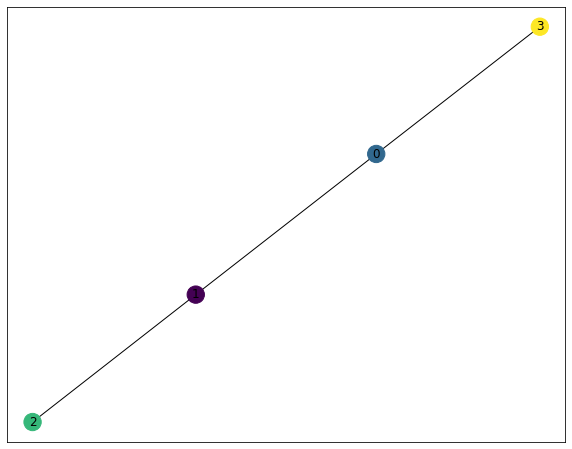

In [8]:
#print node and edge count of tree
print("NUMBER OF NODES ", T1.number_of_nodes())
print("NUMBER OF EDGES ", T1.number_of_edges())
#print adjacency matrix of chosen tree
print("ADJACENCY MATRIX= \n", T1_adj)
#plot tree
VisualizeGraph(T1)

In [9]:
random.seed(seed)

#choose cycle randomly from list
C1=random.choice(cycles)
#get adjacency matrix
C1_adj=nx.to_numpy_array(C1)

NUMBER OF NODES  4
NUMBER OF EDGES  4
ADJACENCY MATRIX= 
 [[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


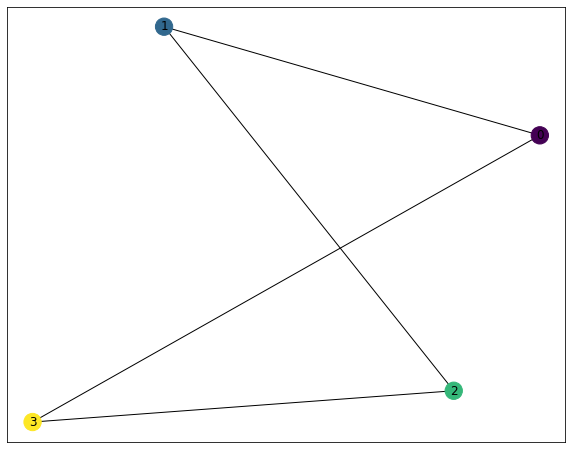

In [10]:
#print node and edge count of cycle
print("NUMBER OF NODES ", C1.number_of_nodes())
print("NUMBER OF EDGES ", C1.number_of_edges())
#print adjacency matrix
print("ADJACENCY MATRIX= \n", C1_adj)
#plot cycle
VisualizeGraph(C1)

In [11]:
print(hom(T1, G1))
time.sleep(5) 
print(hom(C1, G1))

274.0
176.0


In [12]:
#calculate degree centrality of G1
G1_ndegree=degree_centrality(G1)

In [13]:
#calculate degree centrality of T1
T1_ndegree=degree_centrality(T1)
#extract degree values of nodes only
T1_ndegree=list(dict.values(T1_ndegree))
#remove outlier
T1_ndegree.remove(max(T1_ndegree))

In [14]:
#calculate degree centrality of C1
C1_ndegree=degree_centrality(C1)
#extract degree values of nodes only
C1_ndegree=list(dict.values(C1_ndegree))
#remove outlier
C1_ndegree.remove(max(C1_ndegree))

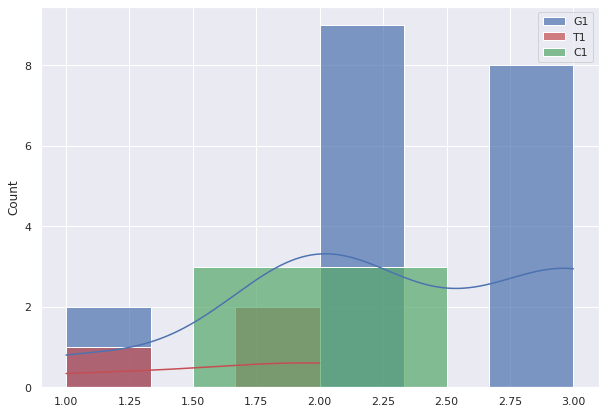

In [15]:
#I used sns library for better visualization of overlaid figure of node degrees 
sns.set(style="darkgrid")
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data=G1_ndegree, alpha=0.7, color='b',label="G1",kde=True)
sns.histplot(data=T1_ndegree, alpha=0.7, color='r', label="T1",kde=True)
sns.histplot(data=C1_ndegree, alpha=0.7, color='g', label="C1")
plt.legend(loc='best')
plt.show()

Graph node degrees are higher than cycle and tree. Cycle degree is constant, tree degree and graph follows increasing order.

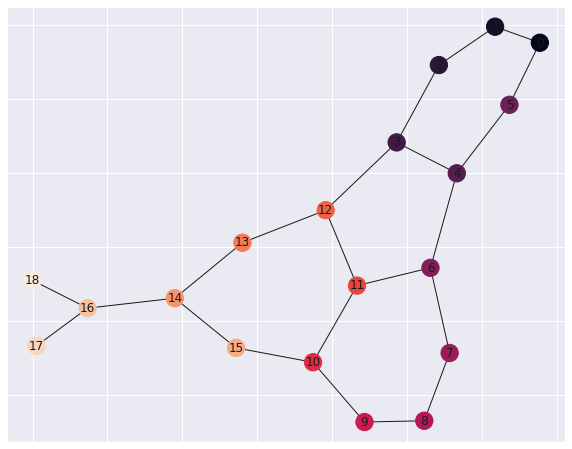

In [16]:
VisualizeGraph(G1)

In [17]:
#initialize array for simulated graphs
simulated_graphs=[]
#initialize array for degree sequence of G*
sequence = []
#fill sequence array for node degrees of G*
for i in range(len(G1_ndegree)):
    #add to list degree value
    sequence.append(G1_ndegree[i])
#create 100 graphs having the same node degrees    
for k in range(100):
    #create random graph having the same node degree as G*
    A = nx.random_degree_sequence_graph(sequence, seed=42)
    #sort the list of degrees 0-n
    sorted(d for n, d in A.degree())
    #add to simulation array
    simulated_graphs.append(A)

100


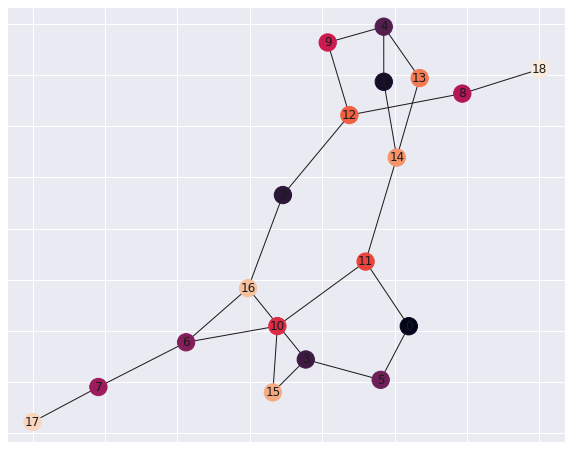

In [18]:
random.seed(seed)

#confirm we have 100 simulated graphs
print(len(simulated_graphs))
#randomly choose from one of them
rand=random.choice(simulated_graphs)
time.sleep(1)
#plot randomly selected simulated graph
VisualizeGraph(rand)

In [19]:
random.seed(seed)

#initialize array for simulated trees
simulated_trees=[]
#initialize array for degree sequence of T*
sequence = []
#fill sequence array for node degrees of T*
for i in range(len(T1_ndegree)):
    #add to list degree value
    sequence.append(T1_ndegree[i])
#add last edge  
sequence.append(T1_ndegree[i])
#create 100 trees having the same node degrees    
for k in range(100):
    #create random graph having the same node degree as T*
    T = nx.generators.degree_seq.degree_sequence_tree(sequence)
    #sort the list of degrees 0-n
    sorted(d for n, d in T.degree())
    #add to simulation array
    simulated_trees.append(T)

100


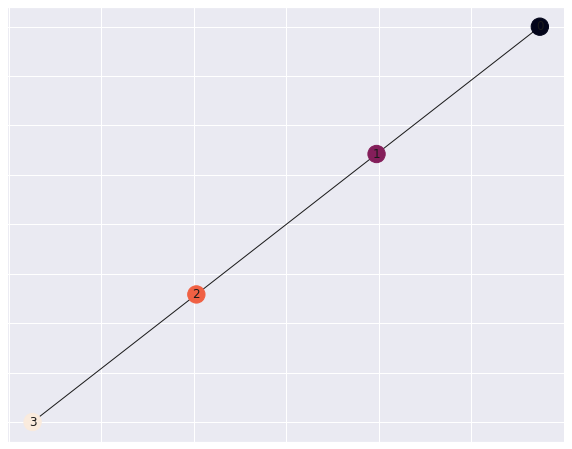

In [20]:
#confirm we have 100 simulated trees
print(len(simulated_trees))
#randomly choose from one of them
rand=random.choice(simulated_trees)
#plot the chosen simulated tree
VisualizeGraph(rand)

In [21]:
#degree is always 2 for a cycle
simulated_cycles=cycle_list(13,num_loops=1)
#remove outlier
simulated_cycles.remove(simulated_cycles[-1])
#remove outlier
simulated_cycles.remove(simulated_cycles[-1])

100


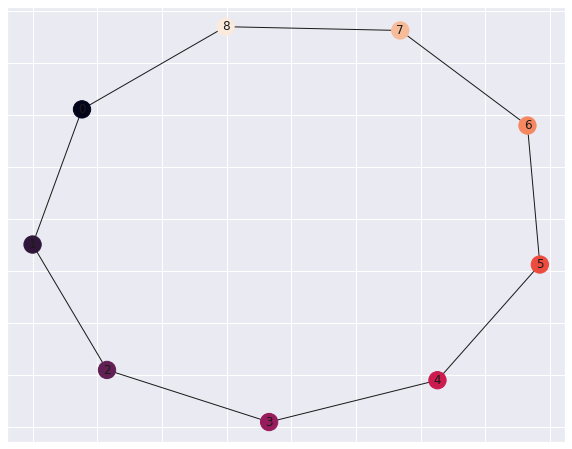

In [22]:
#confirm we have 100 simulated cycles
print(len(simulated_cycles))
#randomly choose from one of them
rand=random.choice(simulated_cycles)
#plot the chosen simulated cycle
VisualizeGraph(rand)

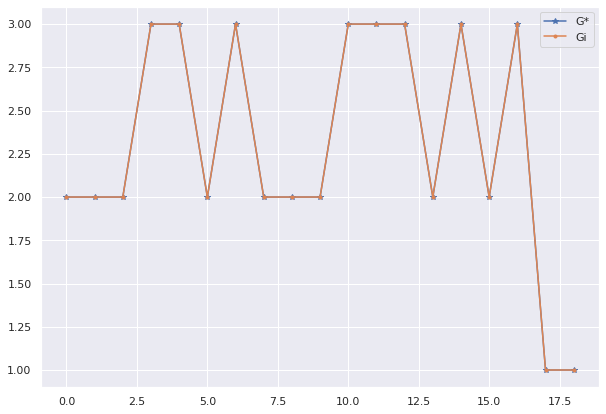

In [23]:
#anchor graph G1 degree distribution array 
GGi=[]
#loop over all simulated graphs and calculate each degre distribution
for G in simulated_graphs:
    #assign degree centrality of a graph
    GGi=degree_centrality(G)

#plot Gi and G*=G1
fig, axs = plt.subplots(figsize=(10,7))
plt.plot(G1_ndegree.values(), label = "G*",marker='*')
plt.plot(GGi.values(), label = "Gi",marker='.')
plt.legend(loc='best')
plt.show()

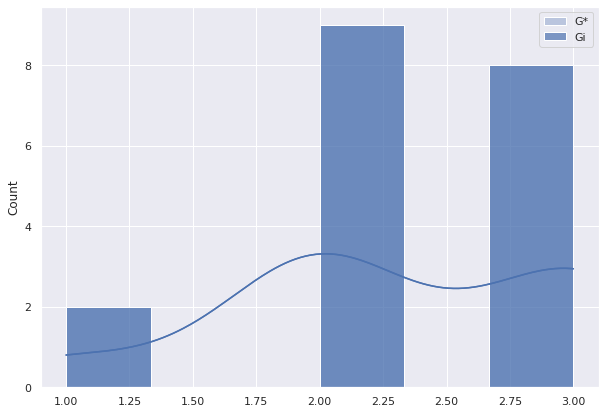

In [24]:
#I used sns library for better visualization of overlaid figure of node degrees 
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data=G1_ndegree.values(), alpha=0.3, label="G*",kde=True)
sns.histplot(data=GGi.values(), alpha=0.7, color='r', label="Gi",kde=True)
plt.legend(loc='best')
plt.show()

In overlaid plot, degree distributions of G* and Gi are similar because Gi has the same node degree as with G*. There isn't any fragmentation for this example but there were other randomized graphs where we had fragmentation which caused degree distribution to change. As node number increases degree changes between higher and lower values. When node count increases the degree decreases dramatically forming modular graphs.When N:16 we see modular structure again interestingly.

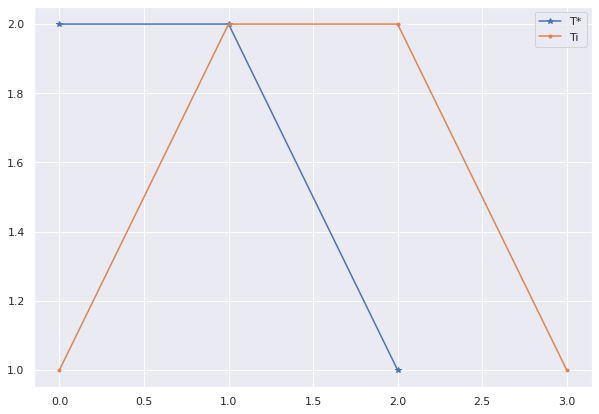

In [25]:
#anchor tree T1 degree distribution array 
TGi=[]
for T in simulated_trees:
    #assign centrality values o a tree
    TGi=degree_centrality(T)

fig, axs = plt.subplots(figsize=(10,7))
plt.plot(T1_ndegree, label = "T*",marker='*')
plt.plot(TGi.values(), label = "Ti",marker='.')
plt.legend(loc='best')
plt.show()

T* breaks down to its modules while Ti stays the same for a while until N:2 then it breaks as well.

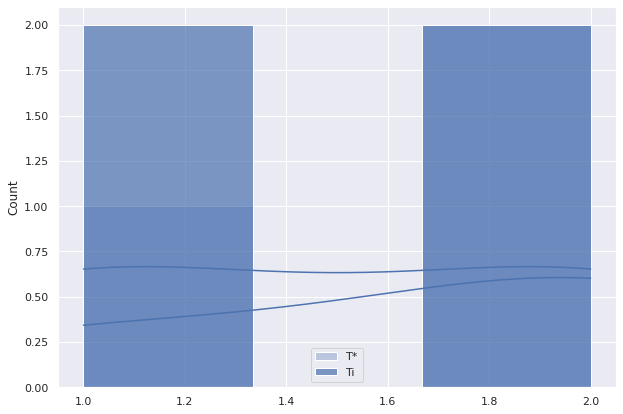

In [26]:
#I used sns library for better visualization of overlaid figure of node degrees 
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data=T1_ndegree, alpha=0.3, label="T*",kde=True)
sns.histplot(data=TGi.values(), alpha=0.7,  label="Ti",kde=True)
plt.legend(loc='best')
plt.show()

Ti shows different behavior than T*

In overlaid plot, degree distributions of T* and Ti are diversed, at the same node value Ti has higher degree centrality than that of T* indicating more connected modular structure while T* shows hierarchical modularity.

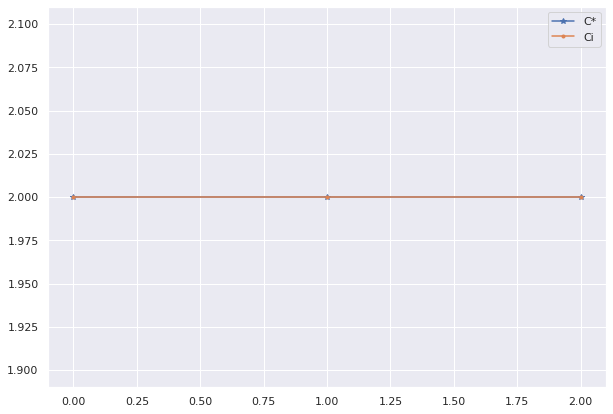

In [27]:
#anchor cycle C1 degree distribution array
Ci=C1_ndegree
#plot Ci and C* 
fig, axs = plt.subplots(figsize=(10,7))
plt.plot(C1_ndegree, label = "C*",marker='*')
plt.plot(Ci, label = "Ci",marker='.')
plt.legend(loc='best')
plt.show()


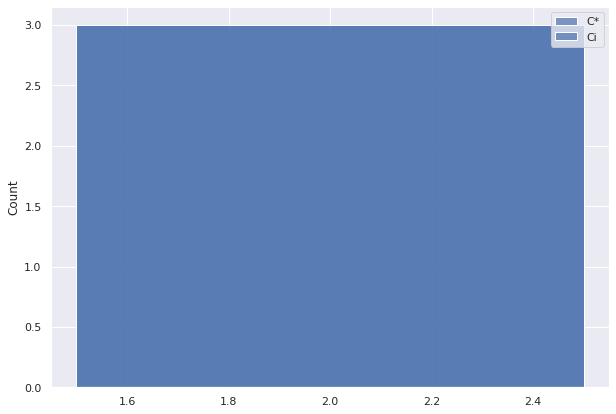

In [28]:
#I used sns library for better visualization of overlaid figure of node degrees 
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data=C1_ndegree, alpha=0.7, label="C*",kde=True)
sns.histplot(data=Ci, alpha=0.7,  label="Ci",kde=True)
plt.legend(loc='best')
plt.show()

In overlaid plot, degree distributions of C* and Ci are similar because cycle has always node degree of 2

In [29]:
#!python models/mlp.py --data=MUTAG --hom_type=tree --hom_size=6

In [30]:
#!python models/mlp.py --data=proteins --hom_type=tree --hom_size=6

In [31]:
#!python models/mlp.py --data=ptc_mr --hom_type=tree --hom_size=6

In [32]:
#!python models/mlp.py --data=COLLAB --hom_type=tree --hom_size=6

In [33]:
#!python models/mlp.py --data=MUTAG --hom_type=cycle --hom_size=8

In [34]:
#!python models/mlp.py --data=proteins --hom_type=cycle --hom_size=8

In [35]:
#!python models/mlp.py --data=ptc_mr --hom_type=cycle --hom_size=8

In [36]:
#!python models/mlp.py --data=COLLAB --hom_type=cycle --hom_size=8